In [1]:
# Reading data through pandas
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('./ObesityDataSet_raw_and_data_sinthetic.csv')
print(df.shape)
df.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
# Info View detailed information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [3]:
# Are there any missing values
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

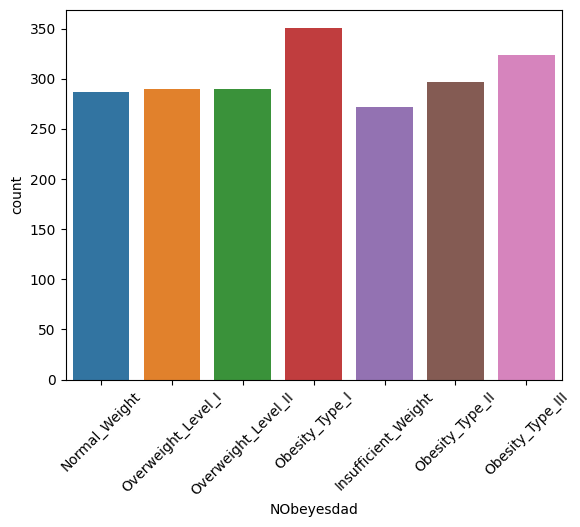

In [6]:
sns.countplot(x = df['NObeyesdad'])
# Rotate labels on the x-axis
plt.xticks(rotation=45)
# display graphics
plt.show()

In [7]:
df.head(1)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight


In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode
col_list = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC'
           ,'CALC','MTRANS','NObeyesdad']

for col in col_list:
    df[col] = LabelEncoder().fit_transform(df[col])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report,confusion_matrix,roc_curve,auc
from sklearn.preprocessing import MinMaxScaler

data = df.drop(['NObeyesdad'],axis = 1)
label = df['NObeyesdad']

# Divide training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)

print(X_train.shape,X_test.shape)

(1477, 16) (634, 16)


In [12]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Building a Neural Network for Multi class Classification
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')  # The output layer of multi class classification uses softmax activation function
])

# Compilation Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Loss function for multi class classification
              metrics=['accuracy'])

# training model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Making Predictions
predictions = model.predict(X_test)

Epoch 1/100
24/24 [==============================] - 1s 7ms/step - loss: 1.9213 - accuracy: 0.2207 - val_loss: 1.8459 - val_accuracy: 0.3943
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.7980 - accuracy: 0.3555 - val_loss: 1.6882 - val_accuracy: 0.4543
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.6328 - accuracy: 0.4062 - val_loss: 1.4834 - val_accuracy: 0.4937
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.4547 - accuracy: 0.4638 - val_loss: 1.3129 - val_accuracy: 0.5363
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.3339 - accuracy: 0.4787 - val_loss: 1.1711 - val_accuracy: 0.5883
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2122 - accuracy: 0.5288 - val_loss: 1.0616 - val_accuracy: 0.6293
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1535 - accuracy: 0.5443 - val_loss: 0.9815 - val_accuracy: 0.6356
Epoch 8/100
2

In [13]:
# Convert probability values to category labels
predicted_labels = (predictions.argmax(axis=1)).astype(int)  # Obtain the category with the highest probability as the prediction label

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, predicted_labels))

# Calculate AUC
auc_score = roc_auc_score(y_test, predictions, multi_class='ovr')  # Multi class classification problems need to be set up multi_class='ovr'
print("AUC Score:", auc_score)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        86
           1       0.94      0.90      0.92        93
           2       0.98      0.99      0.99       102
           3       0.98      0.98      0.98        88
           4       1.00      0.99      0.99        98
           5       0.91      0.91      0.91        88
           6       0.96      0.94      0.95        79

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

AUC Score: 0.9970480182122264


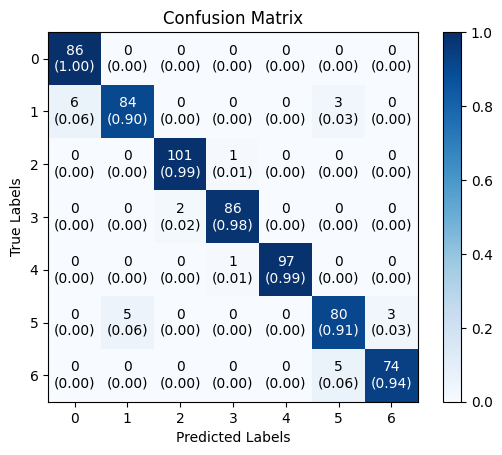

In [14]:
from mlxtend.plotting import plot_confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Draw confusion matrix
plot_confusion_matrix(conf_matrix, show_normed=True,colorbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

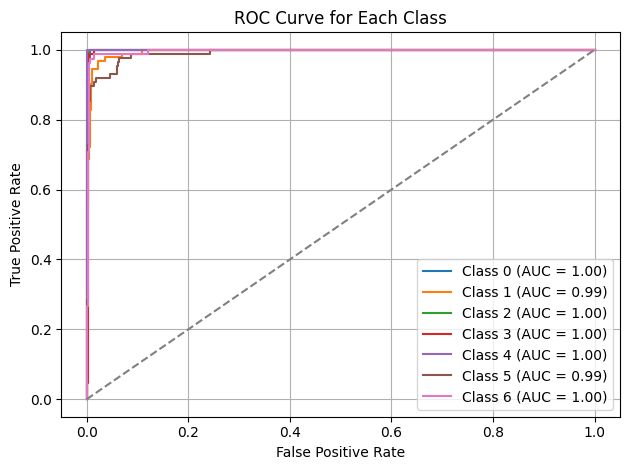

In [16]:
num_classes = 7

from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve and AUC for each category
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_test == i, predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Draw ROC curves for each category
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

# Draw diagonal lines
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add titles and labels
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()

# display graphics
plt.show()